multiNetX is a python package for the manipulation and 
study of multilayer networks. The core of this package 
is a MultilayerGraph, a class that inherits all properties
from networkx.Graph(). 

This allows for:


- Creating networks with weighted or unweighted links (only undirected networks are supported in this version)
- Analysing the spectral properties of adjacency or Laplacian matrices 
- Visualizing dynamical processes by coloring the nodes and links accordingly 

How to install multiNetX
=========

multinetx does not need intallation. 
You simply download the source files and save them into your file system. 
Then you have to add that directory to your PYTHONPATH. 
In Unix/Linux you can do this by writting in the terminal the following command:
	
	export PYTHONPATH=path_to_your_python_libraries/multinetx:$PYTHONPATH



How to use multiNetX
=========

multiNetX is very easy to use. It is based on networkX package (https://networkx.github.io/) which is written in pure python and make use of the standard python packages numpy and scipy. Basic knowledge of python2.7 as well as of those packages is required in order to understand the following guide. A fundamental knowledge of network theory is also required.

#### Import standard python packages for numerics and plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Import the package multiNetX

In [2]:
import multinetx as mx

# Create a multiplex 1st way

#### Create three Erd"os- R'enyi networks with N nodes for each layer

In [3]:
N = 5
g1 = mx.generators.erdos_renyi_graph(N,0.9,seed=218)
g2 = mx.generators.erdos_renyi_graph(N,0.9,seed=211)
g3 = mx.generators.erdos_renyi_graph(N,0.9,seed=208)

#### Create an 3Nx3N lil sparse matrix. It will be used to describe the layers interconnection

In [4]:
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

#### Define the type of interconnection among the layers (here we use identity matrices thus connecting one-to-one the nodes among layers)

In [5]:
adj_block[0:  N,  N:2*N] = np.identity(N)    # L_12
adj_block[0:  N,2*N:3*N] = np.identity(N)    # L_13
adj_block[N:2*N,2*N:3*N] = np.identity(N)    # L_23

# use symmetric inter-adjacency matrix
adj_block += adj_block.T

#### Create an instance of the MultilayerGraph class

In [6]:
mg = mx.MultilayerGraph(list_of_layers=[g1,g2,g3],
                        inter_adjacency_matrix=adj_block)

#### Weights can be added to the edges

In [7]:
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=3)

# Create a multiplex 2nd way

#### Create an empty multiplex network

In [8]:
mg = mx.MultilayerGraph()

#### Add layers

In [9]:
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.9,seed=218))
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.9,seed=211))
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.9,seed=208))

#### Create an instance of the MultilayerGraph class

In [10]:
mg.layers_interconnect(inter_adjacency_matrix=adj_block)

#### Weights can be added to the edges

In [11]:
mg.set_edges_weights(intra_layer_edges_weight=2,
                     inter_layer_edges_weight=3)

# Take some information for the multiplex network

In [12]:
print 'MultiNetX name:\n', mg.name ,'\n', mg.info(),'\n'

MultiNetX name:
gnp_random_graph(5,0.9) 
3-layer graph, intra_layer_edges:27, inter_layer_edges:15, number_of_nodes_in_layer:5  



In [13]:
print 'MultilayerGraph edges:',\
        '\n\n intra-layer edges: ',mg.get_intra_layer_edges(),\
        '\n\n inter-layer edges: ',mg.get_inter_layer_edges(),'\n' 

MultilayerGraph edges: 

 intra-layer edges:  [(0, 1), (0, 2), (0, 4), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14)] 

 inter-layer edges:  [(5, 0), (6, 1), (7, 2), (8, 3), (9, 4), (10, 0), (10, 5), (11, 1), (11, 6), (12, 2), (12, 7), (13, 3), (13, 8), (14, 4), (14, 9)] 



In [14]:
print 'intralayer edges of 1: ',mg.get_intra_layer_edges_of_layer(layer=0)
print 'intralayer edges of 2: ',mg.get_intra_layer_edges_of_layer(layer=1)
print 'intralayer edges of 3: ',mg.get_intra_layer_edges_of_layer(layer=2)

intralayer edges of 1:  [(0, 1), (0, 2), (0, 4), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4)]
intralayer edges of 2:  [(5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
intralayer edges of 3:  [(10, 11), (10, 12), (10, 13), (10, 14), (11, 12), (11, 13), (11, 14), (12, 13), (12, 14)]


#### A layer can be chosen: it is a networkx.Graph so it inherits all of its properties.

In [15]:
layer = 1
mg1 = mg.get_layer(layer-1)
print 'layer', layer, ' name is', mg1.name

layer 1  name is gnp_random_graph(5,0.9)


In [16]:
print 'Adjacency matrix:\n', \
        mx.adjacency_matrix(mg,weight=None).todense(),'\n'
print 'Adjacency matrix (weighted):\n', \
        mx.adjacency_matrix(mg,weight="weight").todense(),'\n'

Adjacency matrix:
[[0 1 1 0 1 1 0 0 0 0 1 0 0 0 0]
 [1 0 1 0 1 0 1 0 0 0 0 1 0 0 0]
 [1 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 1 0 0 0 1 0 0 0 0 1 0]
 [1 1 1 1 0 0 0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 1 1 0 0 0 0]
 [0 1 0 0 0 1 0 1 1 1 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 1 1 0 0 1 0 0]
 [0 0 0 1 0 1 1 1 0 1 0 0 0 1 0]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 0 1 0 0 0 0 0 1 1 1 1]
 [0 1 0 0 0 0 1 0 0 0 1 0 1 1 1]
 [0 0 1 0 0 0 0 1 0 0 1 1 0 1 1]
 [0 0 0 1 0 0 0 0 1 0 1 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 1 1 0 0]] 

Adjacency matrix (weighted):
[[0 2 2 0 2 3 0 0 0 0 3 0 0 0 0]
 [2 0 2 0 2 0 3 0 0 0 0 3 0 0 0]
 [2 2 0 2 2 0 0 3 0 0 0 0 3 0 0]
 [0 0 2 0 2 0 0 0 3 0 0 0 0 3 0]
 [2 2 2 2 0 0 0 0 0 3 0 0 0 0 3]
 [3 0 0 0 0 0 2 2 2 2 3 0 0 0 0]
 [0 3 0 0 0 2 0 2 2 2 0 3 0 0 0]
 [0 0 3 0 0 2 2 0 2 2 0 0 3 0 0]
 [0 0 0 3 0 2 2 2 0 2 0 0 0 3 0]
 [0 0 0 0 3 2 2 2 2 0 0 0 0 0 3]
 [3 0 0 0 0 3 0 0 0 0 0 2 2 2 2]
 [0 3 0 0 0 0 3 0 0 0 2 0 2 2 2]
 [0 0 3 0 0 0 0 3 0 0 2 2 0 2 2]
 [0 0 0 3 0 0 0 0 3 0 2 2 

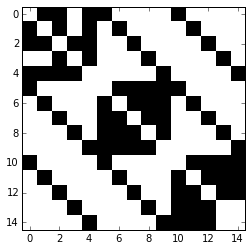

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mx.adjacency_matrix(mg,weight=None).todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.binary);

In [18]:
print 'Laplacian matrix:\n',\
        mx.laplacian_matrix(mg,weight=None).todense(),'\n'
print 'Laplacian matrix (weighted):\n', \
        mx.laplacian_matrix(mg,weight="weight").todense(),'\n'

Laplacian matrix:
[[ 5 -1 -1  0 -1 -1  0  0  0  0 -1  0  0  0  0]
 [-1  5 -1  0 -1  0 -1  0  0  0  0 -1  0  0  0]
 [-1 -1  6 -1 -1  0  0 -1  0  0  0  0 -1  0  0]
 [ 0  0 -1  4 -1  0  0  0 -1  0  0  0  0 -1  0]
 [-1 -1 -1 -1  6  0  0  0  0 -1  0  0  0  0 -1]
 [-1  0  0  0  0  6 -1 -1 -1 -1 -1  0  0  0  0]
 [ 0 -1  0  0  0 -1  6 -1 -1 -1  0 -1  0  0  0]
 [ 0  0 -1  0  0 -1 -1  6 -1 -1  0  0 -1  0  0]
 [ 0  0  0 -1  0 -1 -1 -1  6 -1  0  0  0 -1  0]
 [ 0  0  0  0 -1 -1 -1 -1 -1  6  0  0  0  0 -1]
 [-1  0  0  0  0 -1  0  0  0  0  6 -1 -1 -1 -1]
 [ 0 -1  0  0  0  0 -1  0  0  0 -1  6 -1 -1 -1]
 [ 0  0 -1  0  0  0  0 -1  0  0 -1 -1  6 -1 -1]
 [ 0  0  0 -1  0  0  0  0 -1  0 -1 -1 -1  5  0]
 [ 0  0  0  0 -1  0  0  0  0 -1 -1 -1 -1  0  5]] 

Laplacian matrix (weighted):
[[12 -2 -2  0 -2 -3  0  0  0  0 -3  0  0  0  0]
 [-2 12 -2  0 -2  0 -3  0  0  0  0 -3  0  0  0]
 [-2 -2 14 -2 -2  0  0 -3  0  0  0  0 -3  0  0]
 [ 0  0 -2 10 -2  0  0  0 -3  0  0  0  0 -3  0]
 [-2 -2 -2 -2 14  0  0  0  0 -3  0  0 

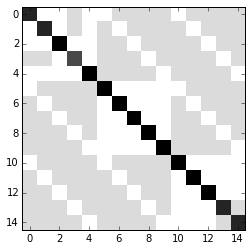

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mx.laplacian_matrix(mg,weight=None).todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.binary);

In [20]:
print 'Laplacian spectrum:\n', \
        mx.laplacian_spectrum(mg,weight="weight"),'\n'

Laplacian spectrum:
[  7.29267473e-15   6.55428082e+00   8.90511420e+00   9.00000000e+00
   9.00000000e+00   9.22799813e+00   1.00000000e+01   1.51991214e+01
   1.73414836e+01   1.77720019e+01   1.90000000e+01   1.90000000e+01
   1.90000000e+01   1.90000000e+01   1.90000000e+01] 



#Plot Multiplex

### Edge colored nertwork (no inter-connected layers)

##### Create a multiplex network with three random layers

In [21]:
mg = mx.MultilayerGraph()

In [22]:
N = 50
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.07,seed=218))
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.07,seed=211))
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.07,seed=208))

##### Set weights to the edges

In [23]:
mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

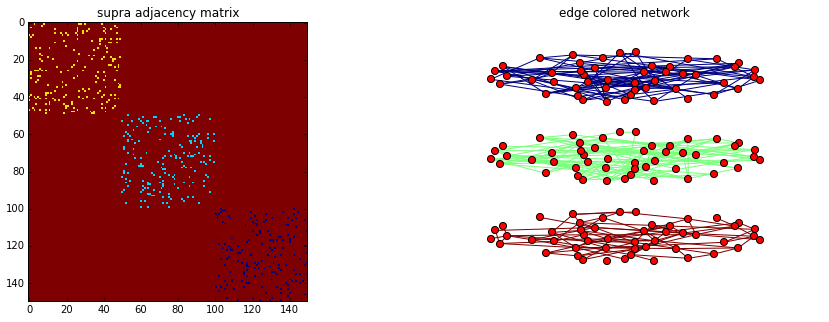

In [25]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('edge colored network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
                      layer_vertical_shift=0.2,
                      layer_horizontal_shift=0.0,
                      proj_angle=47)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

### Regular interconnected multiplex

##### Define the type of interconnection between the layers

In [26]:
adj_block = mx.lil_matrix(np.zeros((N*3,N*3)))

adj_block[0:  N,  N:2*N] = np.identity(N)    # L_12
adj_block[0:  N,2*N:3*N] = np.identity(N)    # L_13
#adj_block[N:2*N,2*N:3*N] = np.identity(N)    # L_23
adj_block += adj_block.T

In [27]:
mg.layers_interconnect(inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=4)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)

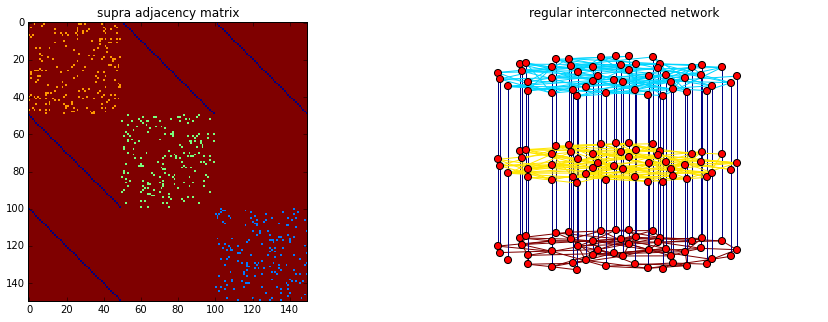

In [28]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('regular interconnected network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
                      layer_vertical_shift=1.4,
                      layer_horizontal_shift=0.0,
                      proj_angle=7)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

### General multiplex

In [29]:
adj_block = mx.lil_matrix(np.zeros((N*4,N*4)))

adj_block[0  :  N ,   N:2*N] = np.identity(N)   # L_12
adj_block[0  :  N , 2*N:3*N] = np.random.poisson(0.005,size=(N,N))   # L_13
adj_block[0  :  N , 3*N:4*N] = np.random.poisson(0.006,size=(N,N))   # L_34
adj_block[3*N:4*N , 2*N:3*N] = np.random.poisson(0.008,size=(N,N))   # L_14
adj_block += adj_block.T
adj_block[adj_block>1] = 1

##### Add one more layer

In [30]:
mg.add_layer(mx.generators.erdos_renyi_graph(N,0.1,seed=218))

In [31]:
mg.layers_interconnect(inter_adjacency_matrix=adj_block)

mg.set_edges_weights(inter_layer_edges_weight=5)

mg.set_intra_edges_weights(layer=0,weight=1)
mg.set_intra_edges_weights(layer=1,weight=2)
mg.set_intra_edges_weights(layer=2,weight=3)
mg.set_intra_edges_weights(layer=3,weight=4)

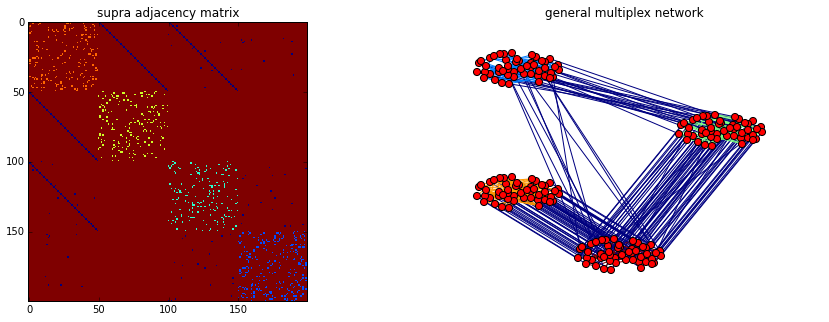

In [32]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.imshow(mx.adjacency_matrix(mg,weight='weight').todense(),
          origin='upper',interpolation='nearest',cmap=plt.cm.jet_r)
ax1.set_title('supra adjacency matrix')

ax2 = fig.add_subplot(122)
ax2.axis('off')
ax2.set_title('general multiplex network')
pos = mx.get_position(mg,mx.fruchterman_reingold_layout(mg.get_layer(0)),
                      layer_vertical_shift=.4,
                      layer_horizontal_shift=1.2,
                      proj_angle=.2)
mx.draw_networkx(mg,pos=pos,ax=ax2,node_size=50,with_labels=False,
                 edge_color=[mg[a][b]['weight'] for a,b in mg.edges()],
                 edge_cmap=plt.cm.jet_r)
plt.show()

Copyright
=========

(C) Copyright 2013-2015, Nikos E Kouvaris

Each file in this folder is part of the multiNetX package.

multiNetX is part of the deliverables of the LASAGNE project 
(multi-LAyer SpAtiotemporal Generalized NEtworks),
EU/FP7-2012-STREP-318132 (http://complex.ffn.ub.es/~lasagne/)

multiNetX is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

multiNetX is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.